We have lots of single runs for various configurations of the search function, starting from random packable points.

We randomly draw from these runs to devise the function of performance with respect to number of calls to the SAT solver.

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [135]:
data = pd.read_csv("./exp_0003.csv", names=["Start", "End", "Convergence", "SimplexSize", "Metric", "NbCalls", "Time"])
data["Metric"] = data.apply(lambda row: float(row["Metric"][:-2]), axis=1)
data["SimplexSize"] = data.apply(lambda row: float(row["SimplexSize"][:-2]), axis=1)
data["Time"] = data.apply(lambda row: eval(row["Time"]), axis=1)
data.head()

Start  \
0  (0.3620934318923079d0 0.5499441657808346d0)   
1  (0.3620934318923079d0 0.5499441657808346d0)   
2  (0.3620934318923079d0 0.5499441657808346d0)   
3  (0.3620934318923079d0 0.5499441657808346d0)   
4  (0.3620934318923079d0 0.5499441657808346d0)   

                                                 End  Convergence  \
0  #(0.3710934318923079d0\n                      ...  VOLUME=0.03   
1  #(0.43209255385376033d0\n                     ...  VOLUME=0.03   
2  #(0.06216843189230787d0\n                     ...  VOLUME=0.03   
3  #(0.3710934318923079d0\n                      ...   VOLUME=0.1   
4  #(0.3920934318923079d0\n                      ...   VOLUME=0.1   

   SimplexSize    Metric  NbCalls      Time  
0         0.03  0.575493        8  0.996494  
1         0.10  0.305827       51  5.629158  
2         0.30  0.198723       67  7.281038  
3         0.03  0.575493        8  0.853900  
4         0.10  0.531474        8  0.880363

In [136]:
# This gives us the best value found by any configuration of the search function, in decreasing order
best_known_metric = data[["Start", "Metric"]].groupby(by="Start").min().sort_values("Metric", ascending=False)
best_known_metric.index

Index(['(0.9366249898484407d0 0.02673965477965301d0)',
       '(0.882379603507395d0 0.006499210251864174d0)',
       '(0.17110899671883395d0 0.6768929841710445d0)',
       '(0.5529300909378021d0 0.31369587826884193d0)',
       '(0.13183361693969098d0 0.7156254575682965d0)',
       '(0.6130639676823384d0 0.18386233419822617d0)',
       '(0.3721849605330607d0 0.398085640367394d0)',
       '(0.12110144003177847d0 0.7038554055676252d0)',
       '(0.043886090512443854d0 0.17330023347143442d0)',
       '(0.20693500737721116d0 0.4776261795221073d0)',
       ...
       '(0.22171224806814527d0 0.37901079161381723d0)',
       '(0.3163126979661337d0 0.24526928632591316d0)',
       '(0.09998938299551652d0 0.864163355859658d0)',
       '(0.34177292787873226d0 0.5294601545663633d0)',
       '(0.4232498067205346d0 0.5222194434937955d0)',
       '(0.19660419121519945d0 0.18841505270542203d0)',
       '(0.3886245260887433d0 0.5540756940430922d0)',
       '(0.14952282748758772d0 0.8131821652700104d0)',


In [137]:
# This reorders the whole dataset to that the points with the worst best known values come first
sorted_data = data.set_index("Start").loc[best_known_metric.index].reset_index()
sorted_data["index"] = sorted_data.index
sorted_data["MethodName"] = sorted_data.apply(lambda row: f"{row['Convergence']},size={row['SimplexSize']}", axis=1)
sorted_data["ConvergenceType"] = sorted_data.apply(lambda row: "volume" if "VOLUME" in row['Convergence'] else "tolerance", axis=1)
sorted_data["ConvergenceValue"] = sorted_data.apply(lambda row: float(row["Convergence"].split("=")[1]), axis=1)
sorted_data

Start  \
0      (0.9366249898484407d0 0.02673965477965301d0)   
1      (0.9366249898484407d0 0.02673965477965301d0)   
2      (0.9366249898484407d0 0.02673965477965301d0)   
3      (0.9366249898484407d0 0.02673965477965301d0)   
4      (0.9366249898484407d0 0.02673965477965301d0)   
...                                             ...   
5879  (0.17529141749239474d0 0.43607463989263073d0)   
5880  (0.17529141749239474d0 0.43607463989263073d0)   
5881  (0.17529141749239474d0 0.43607463989263073d0)   
5882  (0.17529141749239474d0 0.43607463989263073d0)   
5883  (0.17529141749239474d0 0.43607463989263073d0)   

                                                    End      Convergence  \
0     #(0.9816249898484407d0\n                      ...      VOLUME=0.03   
1     #(0.9991231891999738d0\n                      ...      VOLUME=0.03   
2     #(0.9992670890521511d0\n                      ...      VOLUME=0.03   
3     #(0.9666249898484407d0\n                      ...       VOLUME=0.1   
4     #(0.9666249898484407d0\n                      ...       VOLUME=0.1   
...                                                 ...              ...   
5879  #(0.2752799355092254d0\n                      ...  TOLERANCE=0.003   
5880  #(0.06228568283249608d0\n                     ...   TOLERANCE=0.01   
5881  #(0.27404141749239475d0\n                     ...   TOLERANCE=0.01   
5882  #(0.06228568283249608d0\n                     ...   TOLERANCE=0.03   
5883  #(0.27402433564186096d0\n                     ...   TOLERANCE=0.03   

      SimplexSize    Metric  NbCalls       Time  index  \
0            0.03  0.530875       13   1.411783      0   
1            0.10  0.480887       28   3.058936      1   
2            0.30  0.481073       22   2.405514      2   
3            0.03  0.544119        7   0.800791      3   
4            0.10  0.535861        4   0.440617      4   
...           ...       ...      ...        ...    ...   
5879        10.00  0.294471       95  10.500052   5879   
5880         3.00  0.198674       91  10.165700   5880   
5881        10.00  0.294885       54   6.004941   5881   
5882         3.00  0.198674       91  10.201097   5882   
5883        10.00  0.294875       77   8.603237   5883   

                     MethodName ConvergenceType  ConvergenceValue  
0         VOLUME=0.03,size=0.03          volume             0.030  
1          VOLUME=0.03,size=0.1          volume             0.030  
2          VOLUME=0.03,size=0.3          volume             0.030  
3          VOLUME=0.1,size=0.03          volume             0.100  
4           VOLUME=0.1,size=0.1          volume             0.100  
...                         ...             ...               ...  
5879  TOLERANCE=0.003,size=10.0       tolerance             0.003  
5880    TOLERANCE=0.01,size=3.0       tolerance             0.010  
5881   TOLERANCE=0.01,size=10.0       tolerance             0.010  
5882    TOLERANCE=0.03,size=3.0       tolerance             0.030  
5883   TOLERANCE=0.03,size=10.0       tolerance             0.030  

[5884 rows x 11 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


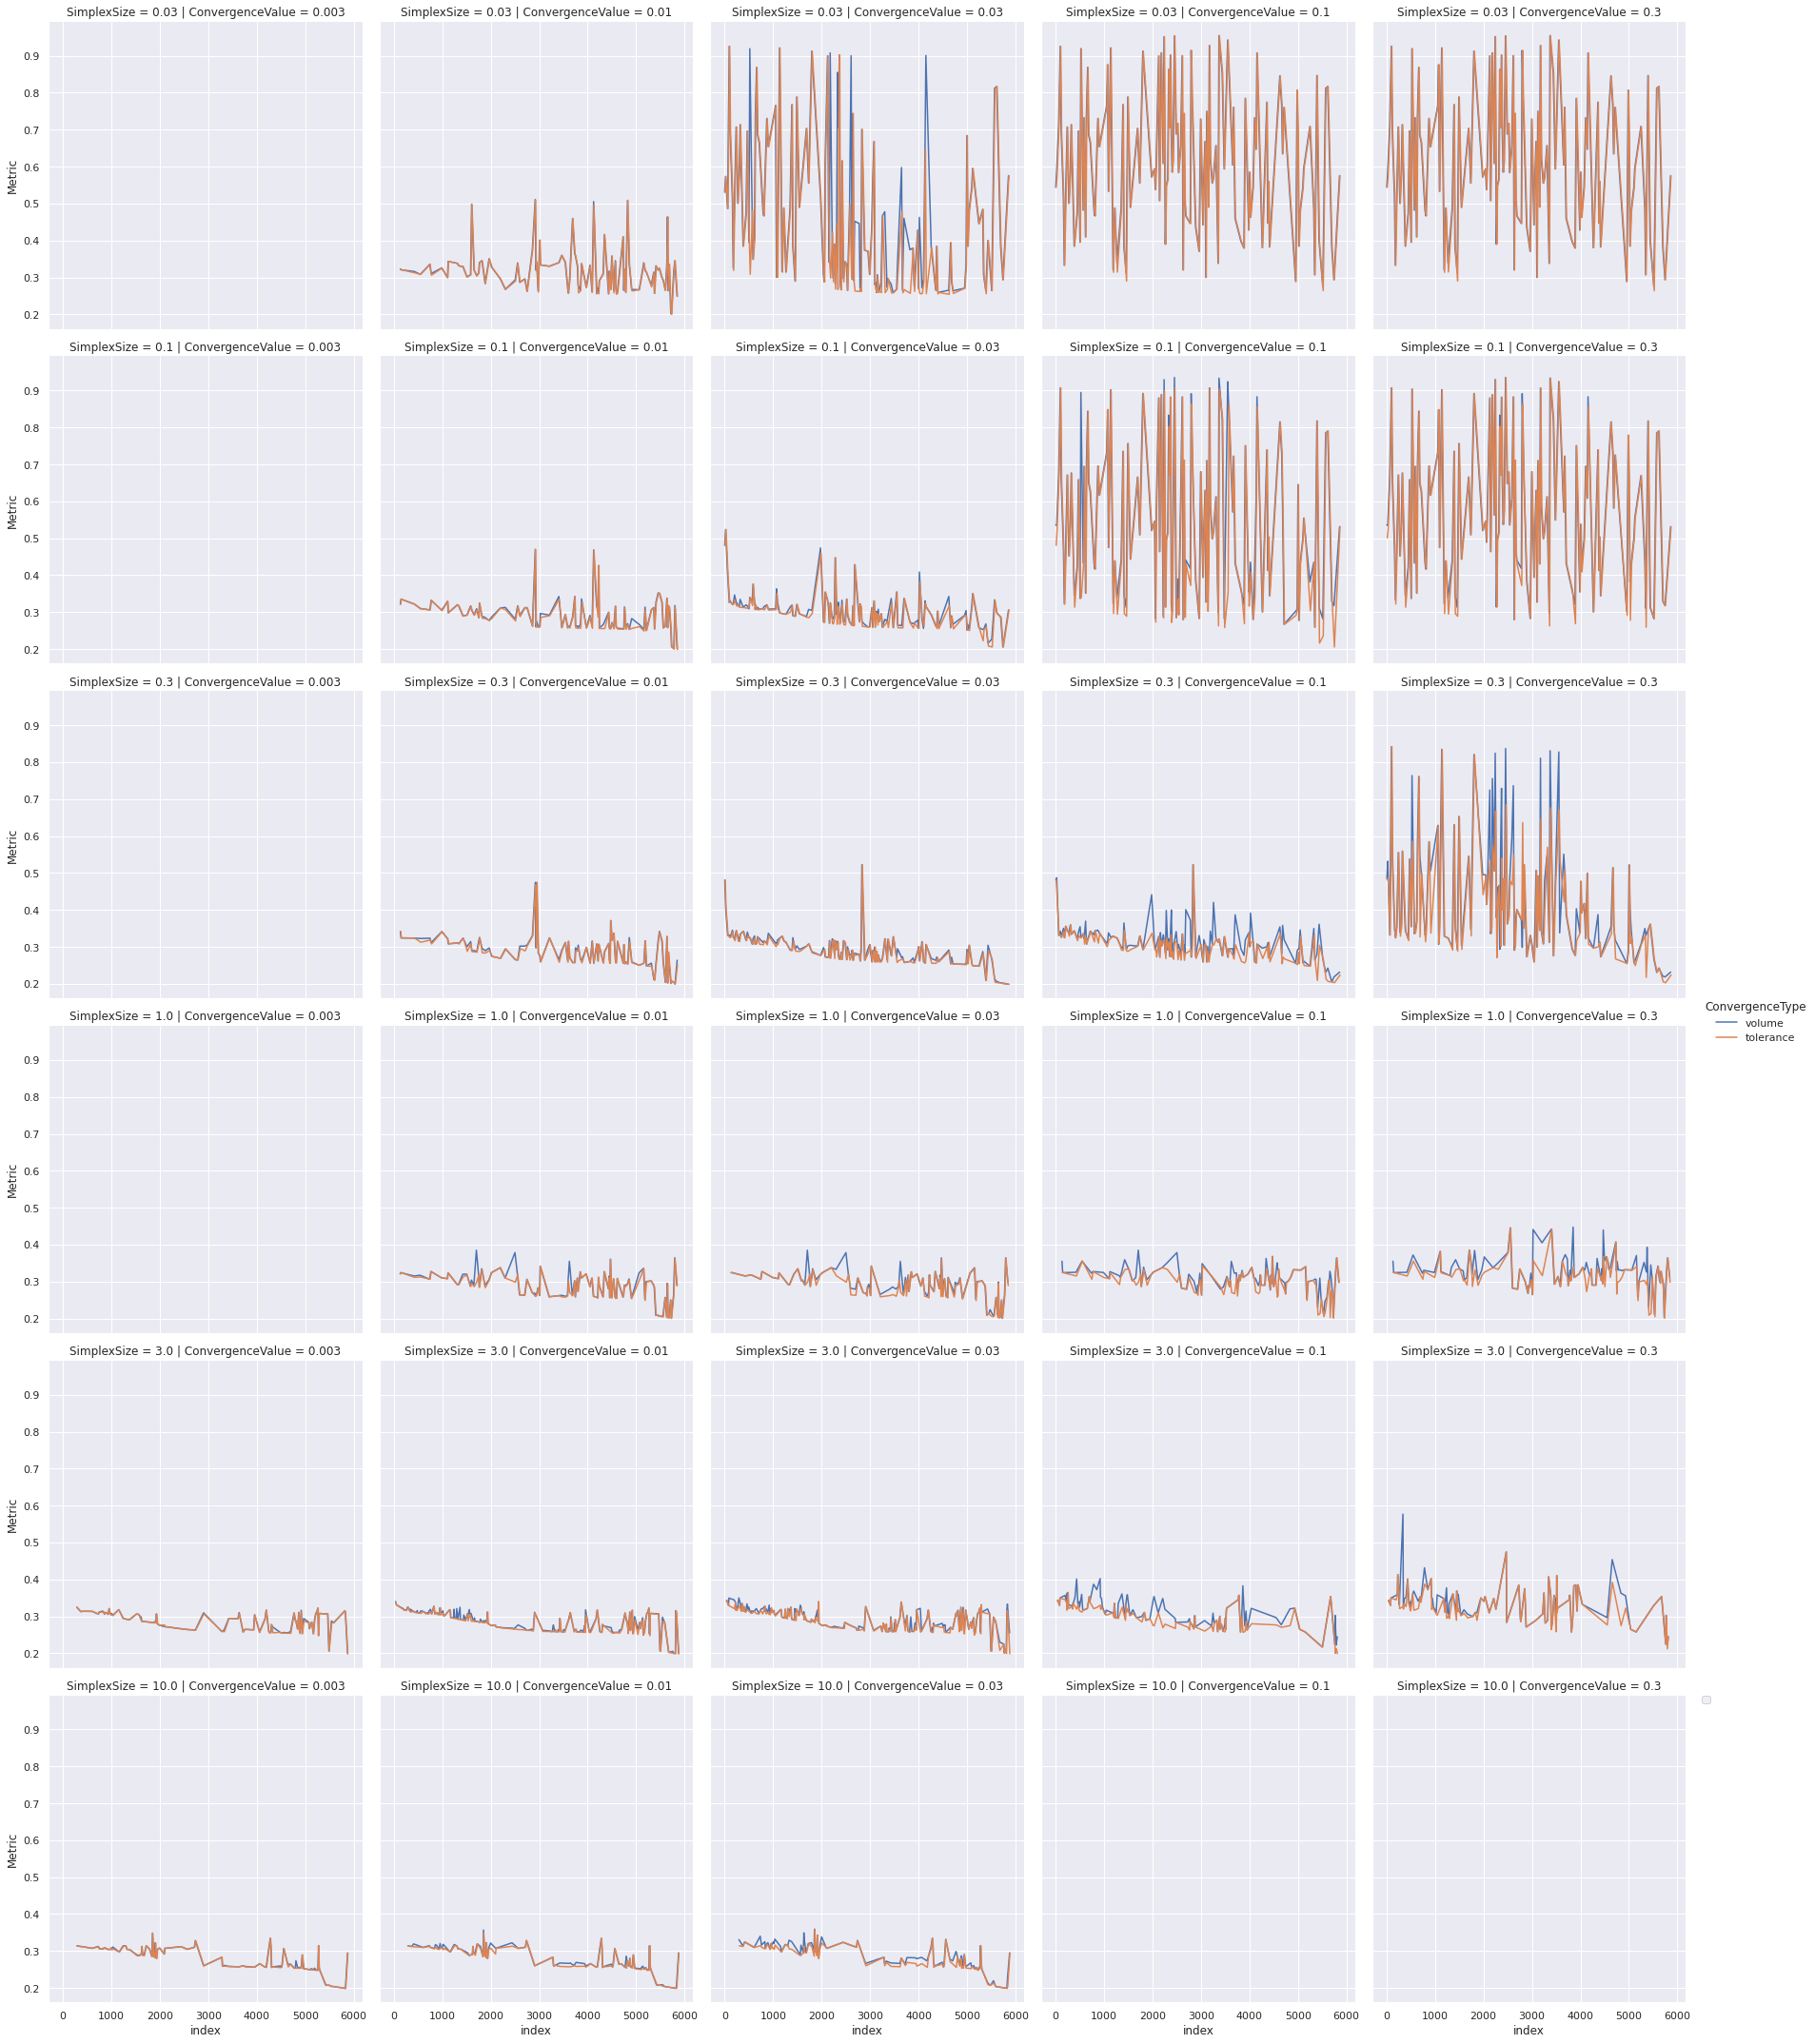

In [138]:
sns.relplot(data=sorted_data, x="index", y="Metric", hue="ConvergenceType", kind="line", col="ConvergenceValue", row="SimplexSize")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

So, the performance seems to be good only when the starting simplex size is bigger than the convergence value.

Among the three couples that exhibit correct performance, there is not stark difference in performance. Let's see if convergence speed can lead us to choose one over the other.

This visualization is becoming less and less useful as time passes, because it assumes that all rows were created in a single run, with all methods run on the same set of starting point. This assumption is violated by me doing mutliple runs.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


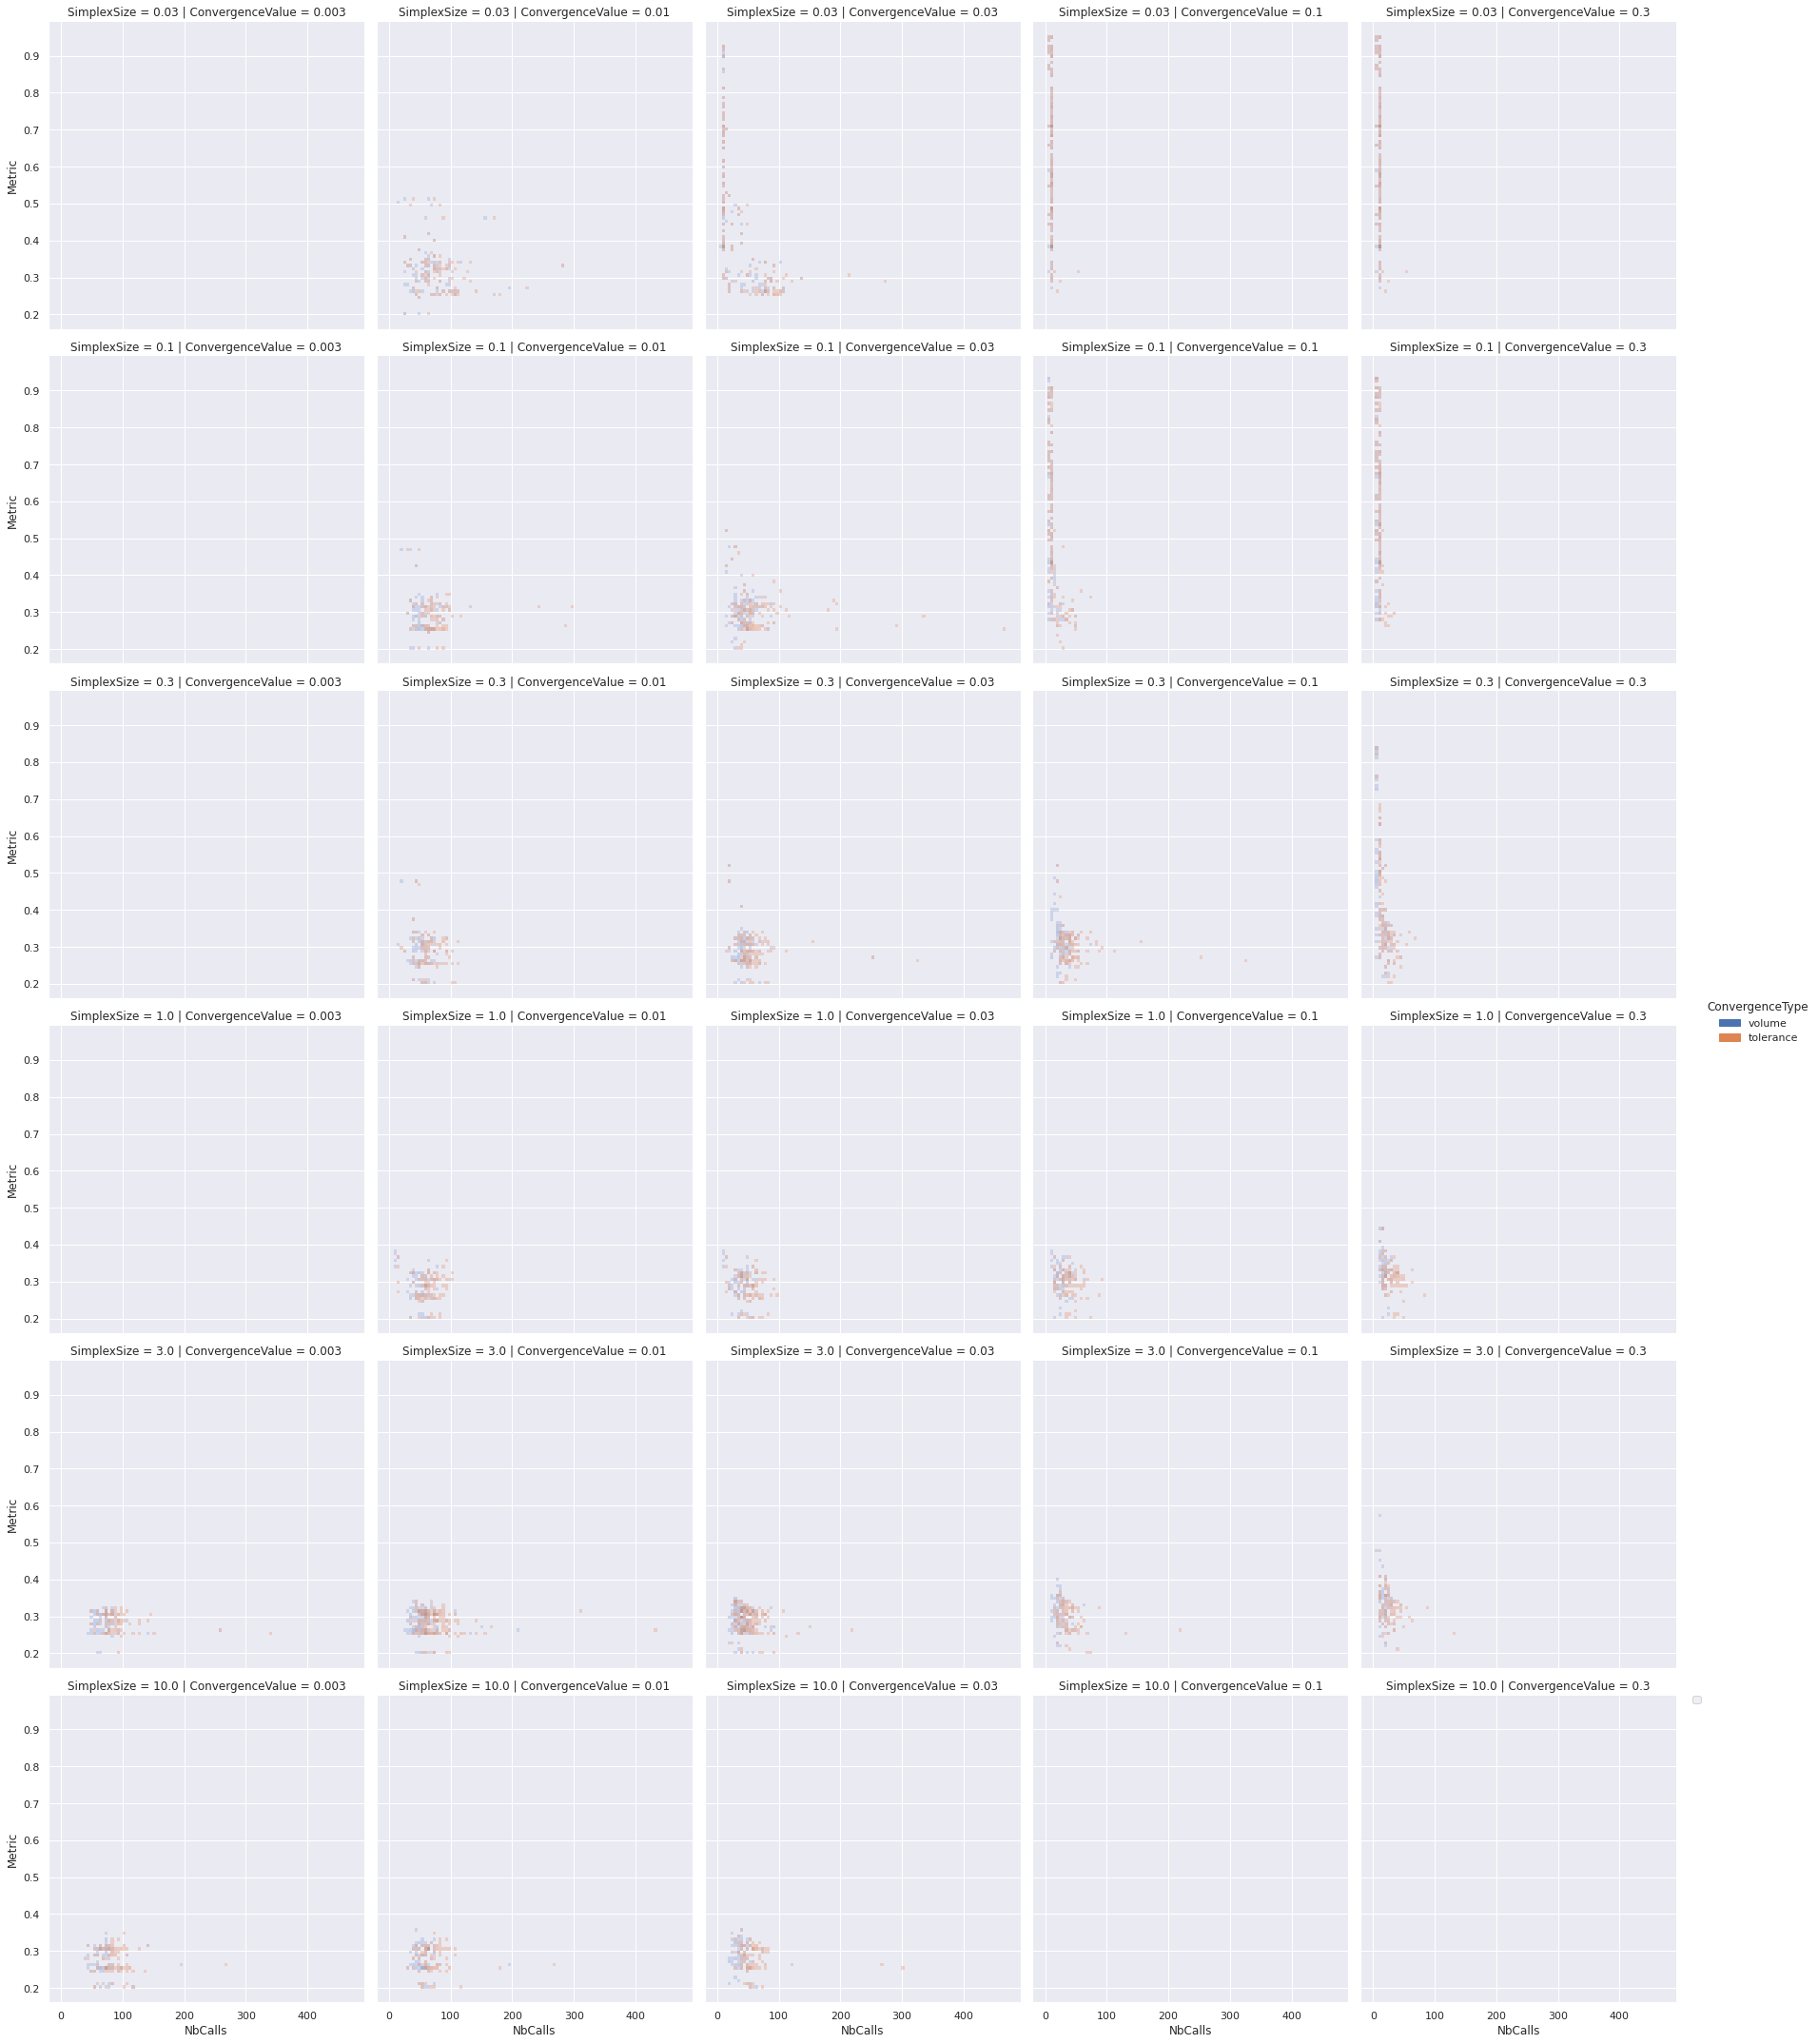

In [139]:
sns.displot(data=sorted_data, x="NbCalls", y="Metric", hue="ConvergenceType", kind="hist", 
            col="ConvergenceValue",  
            row="SimplexSize", row_order=[0.03, 0.1, 0.3, 1.,3., 10.],
           alpha=.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Convergence seems to be consistently faster for the volume method, although its performance, when the value is 0.1 seems to be consistently worse by a bit.

Let's rereun the experiment with a higher starting simplex size (1), and a smaller convergence value (0.01) to see if there is any sense in using more extreme values

I can see no difference in performance when decreasing the convergence value past 0.1 (but I see an increase in nb of calls).

I can confirm that volume is marginally faster, but marginally worse than tolerance.

There is an increase in performance when the simplex size increases, so let's try one more extreme value.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


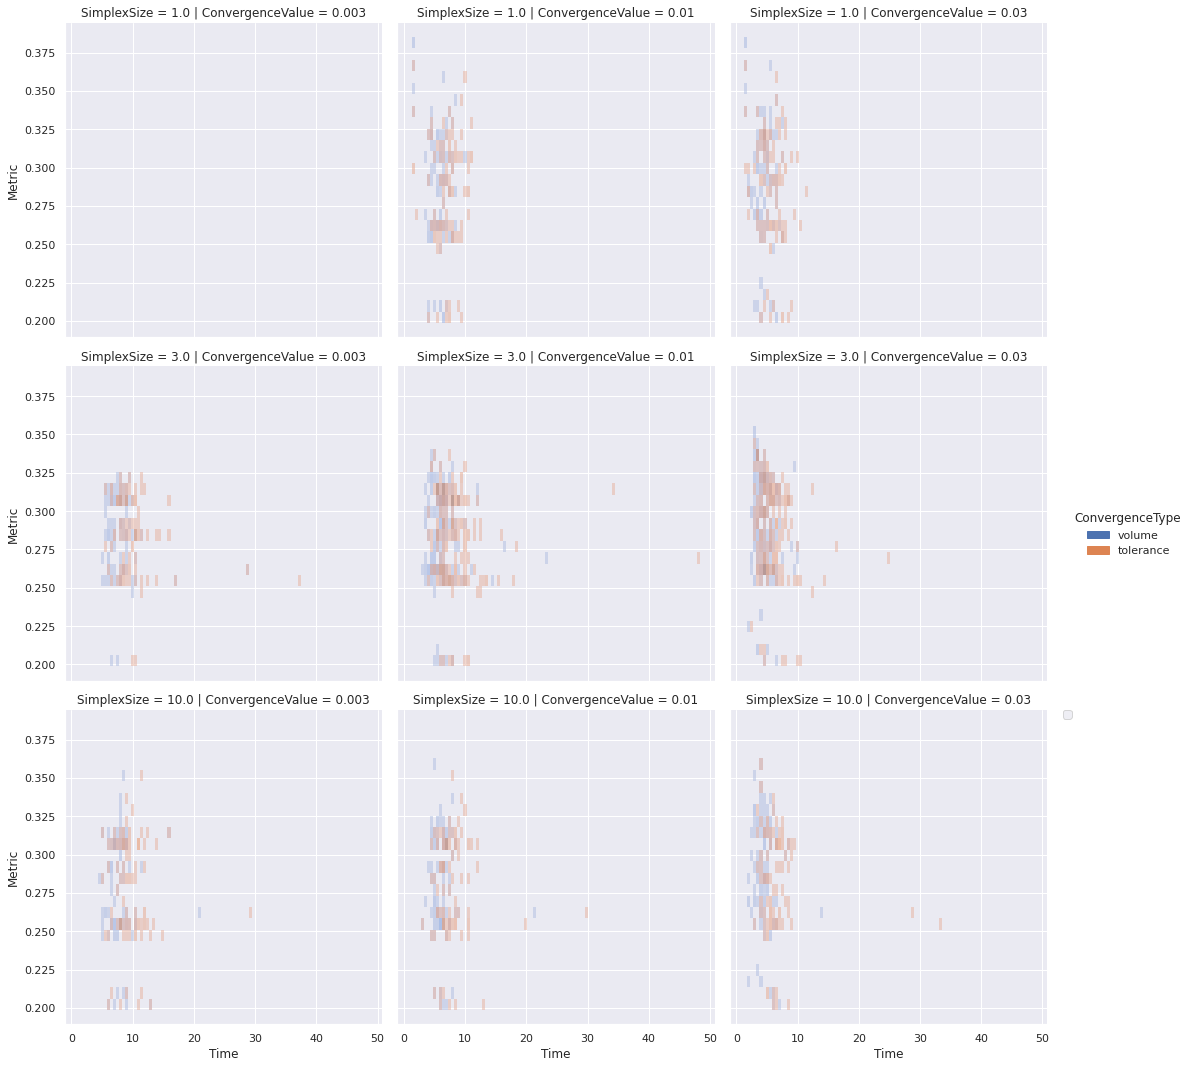

In [140]:
sns.displot(data=sorted_data.query('SimplexSize >= 1. and ConvergenceValue <= 0.03'),
            x="Time", y="Metric", hue="ConvergenceType", kind="hist", 
            col="ConvergenceValue",  
            row="SimplexSize",# row_order=[1.,3.],
           alpha=.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


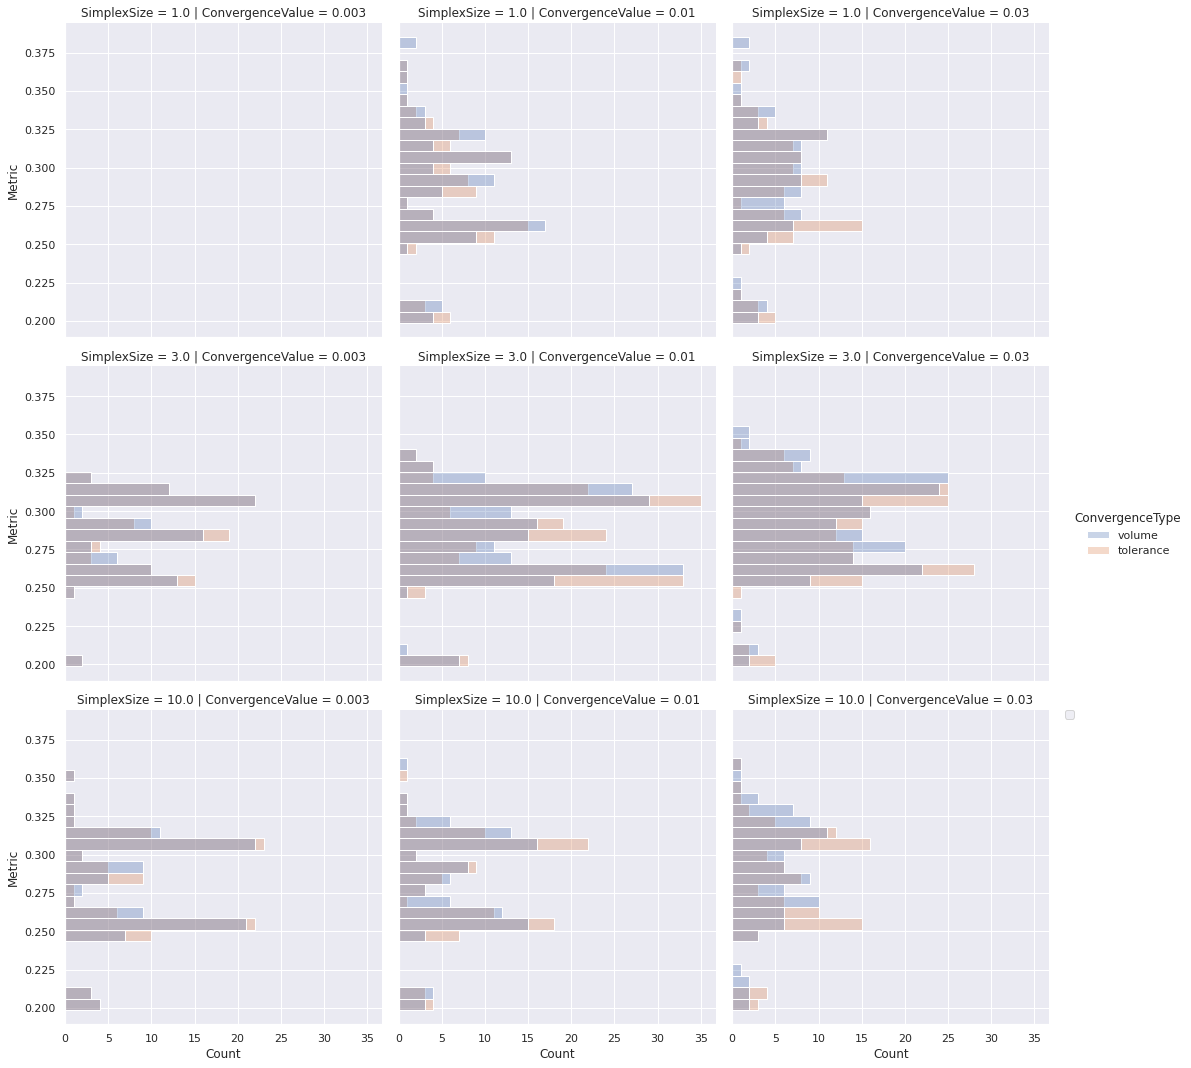

In [141]:
sns.displot(data=sorted_data.query('SimplexSize >= 1. and ConvergenceValue <= 0.03'),
            y="Metric", hue="ConvergenceType", kind="hist", 
            col="ConvergenceValue",  
            row="SimplexSize",# row_order=[1.,3.],
           alpha=.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Performance still looks better in the lower left, so I must try new extreme values in order to find the point after which going more extreme does not bring anything. Performance is acceptable in all cases, so no need to look into that right now. I settle on convergence values below 0.03 and simplex size over 1.0. We'll use the volume criterio only.